In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report , roc_curve , auc , roc_auc_score
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split , StratifiedKFold , RandomizedSearchCV
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Add, GlobalAveragePooling2D, ReLU
from sklearn.preprocessing import label_binarize
from itertools import cycle

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import  relu, sigmoid, softmax
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model , save_model , Model
import cv2

# Load Eminst Dataset which contains English letters   (26 classes)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''from google.colab import files
files.upload()'''


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zeyadsayed12","key":"c48665fbc3b5b0ae22d5c03e779186fb"}'}

In [ ]:
'''import os

# Create the .kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the kaggle.json file to the .kaggle directory
!mv kaggle.json /root/.kaggle/

# Set permissions to the kaggle.json file
!chmod 600 /root/.kaggle/kaggle.json'''

In [ ]:
'''!kaggle datasets download -d crawford/emnist'''


Dataset URL: https://www.kaggle.com/datasets/crawford/emnist
License(s): CC0-1.0
100% 1.24G/1.24G [01:00<00:00, 24.6MB/s]
100% 1.24G/1.24G [01:00<00:00, 22.0MB/s]


In [ ]:
'''!kaggle datasets download -d mloey1/ahcd1'''


Dataset URL: https://www.kaggle.com/datasets/mloey1/ahcd1
License(s): DbCL-1.0
 42% 10.0M/24.0M [00:00<00:00, 37.9MB/s]
100% 24.0M/24.0M [00:00<00:00, 75.0MB/s]


In [ ]:
'''!unzip emnist.zip'''

Archive:  emnist.zip
  inflating: emnist-balanced-mapping.txt  
  inflating: emnist-balanced-test.csv  
  inflating: emnist-balanced-train.csv  
  inflating: emnist-byclass-mapping.txt  
  inflating: emnist-byclass-test.csv  
  inflating: emnist-byclass-train.csv  
  inflating: emnist-bymerge-mapping.txt  
  inflating: emnist-bymerge-test.csv  
  inflating: emnist-bymerge-train.csv  
  inflating: emnist-digits-mapping.txt  
  inflating: emnist-digits-test.csv  
  inflating: emnist-digits-train.csv  
  inflating: emnist-letters-mapping.txt  
  inflating: emnist-letters-test.csv  
  inflating: emnist-letters-train.csv  
  inflating: emnist-mnist-mapping.txt  
  inflating: emnist-mnist-test.csv   
  inflating: emnist-mnist-train.csv  
  inflating: emnist_source_files/emnist-balanced-test-images-idx3-ubyte  
  inflating: emnist_source_files/emnist-balanced-test-labels-idx1-ubyte  
  inflating: emnist_source_files/emnist-balanced-train-images-idx3-ubyte  
  inflating: emnist_source_files/em

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/emnist-letters-train.csv')

# Splitting & Preprocessing

In [ ]:
x = data.iloc[:,1:]
y = data.iloc[ : , 0 ]

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size= 0.15, random_state=42)

In [ ]:
x_val , x_test , y_val , y_test = train_test_split(x_temp , y_temp , test_size=0.5 , random_state=42)

In [ ]:
y_train.unique()

array([22, 15,  1, 24, 19,  5, 12, 11,  7, 10, 21, 26, 18, 20, 14,  4,  6,
        2,  9, 23,  3, 25,  8, 17, 16, 13])

In [ ]:
y_test.unique()

array([ 7, 21, 24, 15, 23, 16, 14, 10, 20, 18, 17,  3, 13, 22, 11, 12,  6,
        4,  8,  9, 25,  1,  5, 26, 19,  2])

In [ ]:
import string

labels = list(string.ascii_uppercase)

print(labels)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


Class Distribution in Training Set:
Class 1: 2882 instances
Class 2: 2883 instances
Class 3: 2919 instances
Class 4: 2912 instances
Class 5: 2947 instances
Class 6: 2871 instances
Class 7: 2859 instances
Class 8: 2911 instances
Class 9: 2911 instances
Class 10: 2856 instances
Class 11: 2906 instances
Class 12: 2884 instances
Class 13: 2909 instances
Class 14: 2836 instances
Class 15: 2900 instances
Class 16: 2910 instances
Class 17: 2923 instances
Class 18: 2894 instances
Class 19: 2891 instances
Class 20: 2944 instances
Class 21: 2934 instances
Class 22: 2915 instances
Class 23: 2897 instances
Class 24: 2929 instances
Class 25: 2946 instances
Class 26: 2910 instances


<ipython-input-9-8fb9f1a47657>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()), palette="Reds_d")


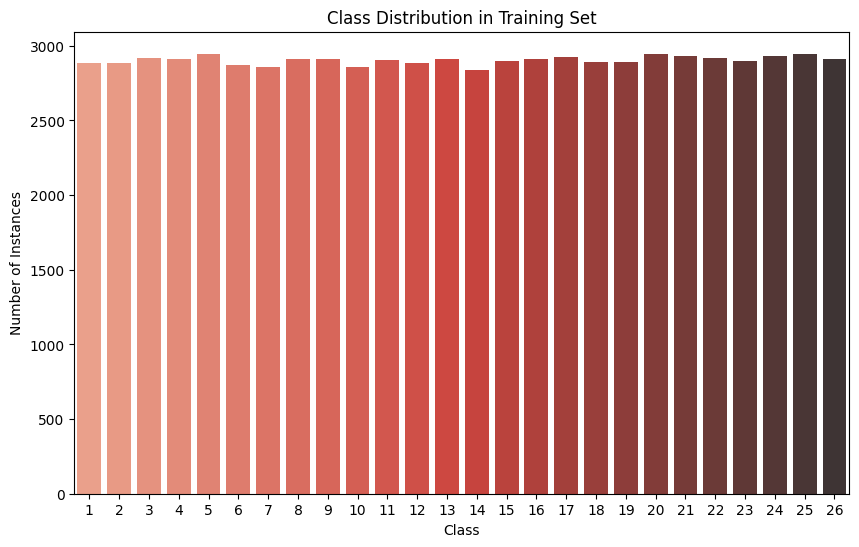

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))


print("Class Distribution in Training Set:")
for cls, count in class_distribution.items():
    print(f"Class {cls}: {count} instances")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()), palette="Reds_d")
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in Training Set')
plt.show()

In [ ]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
x_val = x_val.values.reshape(-1,28,28,1)

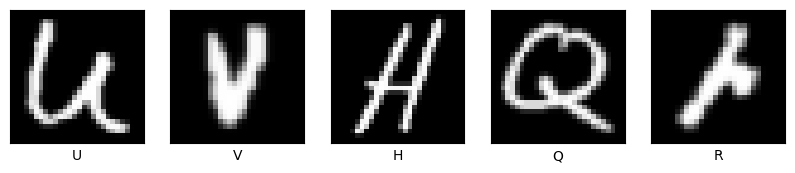

In [ ]:
ra = np.random.choice(x_train.shape[0], size=5, replace=False)

plt.figure(figsize=(10, 2))
for i in range(len(ra)):
    plt.subplot(1, len(ra), i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(28, 28).T, cmap='gray') # Access using index directly
    plt.xlabel(labels[y_train.iloc[ra[i]] - 1], fontsize=10, color='black', ha='center') # Use .iloc for Series
    plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
x_train.shape

(75479, 28, 28, 1)

In [ ]:
x_test.shape

(13320, 28, 28, 1)

In [ ]:
print(type(x_train))

<class 'numpy.ndarray'>


In [ ]:
y_train -= 1
y_test -= 1
y_val -= 1

### Resizing for Resnet  & Densenet Models

### Resizing to 71 , 71  RGB


In [ ]:
x_train_resized = tf.image.resize(x_train, (71, 71))
x_test_resized = tf.image.resize(x_test, (71, 71))
x_val_resized = tf.image.resize(x_val, (71, 71))

x_train_rgb = tf.image.grayscale_to_rgb(x_train_resized)
x_test_rgb = tf.image.grayscale_to_rgb(x_test_resized)
x_val_rgb = tf.image.grayscale_to_rgb(x_val_resized)

In [ ]:
x_train_rgb.shape

TensorShape([75479, 71, 71, 3])

# Modeling

## checkpoint callback

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive/best_resnet.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)


In [ ]:
model_checkpoint_densenet = ModelCheckpoint(
    filepath="/content/drive/MyDrive/best_densenet.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)


In [ ]:
model_checkpoint_xception = ModelCheckpoint(
    filepath="/content/drive/MyDrive/best_xception.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)


## Starting with Miniature version of Resnet18 building with residual blocks

### as emnist data contains grayscale images with shape (28,28) and resnet takes rgb images with shape (224,224) , we will try to minimize resnet filters size and number of strides to be suitable with emnist data

#### building residual block

In [ ]:
def residual_block(x, filters, strides=1):
      shortcut = x
      #1st convolution
      x = Conv2D(filters , kernel_size=3 , strides=strides , padding='same')(x)
      x = BatchNormalization()(x)
      x = ReLU()(x)
      #2nd convolution
      x = Conv2D(filters , kernel_size=3 , strides=1, padding='same')(x)
      x = BatchNormalization()(x)
      if strides != 1 or shortcut.shape[-1] != filters:
            shortcut = Conv2D(filters, kernel_size=1, strides=strides)(shortcut)
            shortcut = BatchNormalization()(shortcut)
       #adding skip connection
      x = Add()([x , shortcut])
      x = ReLU()(x)
      return x

In [ ]:
def minimized_resnet18(input_shape=(28,28,1), num_classes=26):
      inputs = Input(shape=input_shape)
      x = Conv2D(64, kernel_size=3, strides=2, padding='same')(inputs)
      x = BatchNormalization()(x)
      x = ReLU()(x)
      #adding residual blocks
      x = residual_block(x, 64, strides=1)
      x = residual_block(x, 64, strides=1)
      x = residual_block(x, 128, strides=2)
      x = residual_block(x, 128, strides=1)
      x = residual_block(x, 256, strides=2)
      x = residual_block(x, 256, strides=1)
      x = residual_block(x, 512, strides=2)
      x = residual_block(x, 512, strides=1)
      x = GlobalAveragePooling2D()(x)
      outputs = Dense(num_classes, activation='softmax')(x)
      model = Model(inputs,outputs)
      return model


In [ ]:
input_shape = (28,28,1)
num_classes = 26
min_resnet = minimized_resnet18(input_shape, num_classes)
min_resnet.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 14, 14, 64)     │            640 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_24    │ (None, 14, 14, 64)     │            256 │ conv2d_24[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_17 (ReLU)           │ (None, 14, 14, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ re_lu_17[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_25    │ (None, 14, 14, 64)     │            256 │ conv2d_25[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_18 (ReLU)           │ (None, 14, 14, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ re_lu_18[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_26    │ (None, 14, 14, 64)     │            256 │ conv2d_26[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_20 (Add)              │ (None, 14, 14, 64)     │              0 │ batch_normalization_2… │
│                           │                        │                │ re_lu_17[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_19 (ReLU)           │ (None, 14, 14, 64)     │              0 │ add_20[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ re_lu_19[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_27    │ (None, 14, 14, 64)     │            256 │ conv2d_27[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_20 (ReLU)           │ (None, 14, 14, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ re_lu_20[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_28    │ (None, 14, 14, 64)     │            256 │ conv2d_28[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 11,195,418 (42.71 MB)

 Trainable params: 11,185,818 (42.67 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [ ]:
min_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = min_resnet.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.8067 - loss: 0.6335 - val_accuracy: 0.9240 - val_loss: 0.2395
Epoch 2/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - accuracy: 0.9213 - loss: 0.2284 - val_accuracy: 0.9278 - val_loss: 0.2143
Epoch 3/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - accuracy: 0.9347 - loss: 0.1884 - val_accuracy: 0.9318 - val_loss: 0.1872
Epoch 4/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - accuracy: 0.9447 - loss: 0.1566 - val_accuracy: 0.9299 - val_loss: 0.2093
Epoch 5/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - accuracy: 0.9486 - loss: 0.1416 - val_accuracy: 0.9386 - val_loss: 0.1836
Epoch 6/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - accuracy: 0.9554 - loss: 0.1208 - val_accuracy: 0.9327 - val_loss: 0.1958
Epoch 7/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - accuracy: 0.9588 - loss: 0.1060 - val_accuracy: 0.9423 - val_loss: 0.1735
Epoch 8/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - accuracy: 0.9610 -

In [ ]:
min_resnet.save('/content/drive/MyDrive/min_resnet.keras')

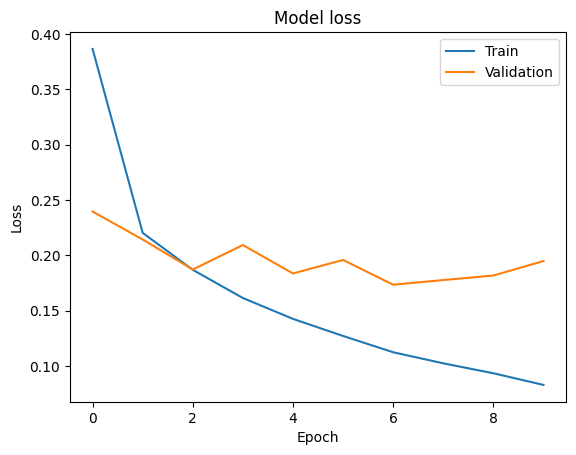

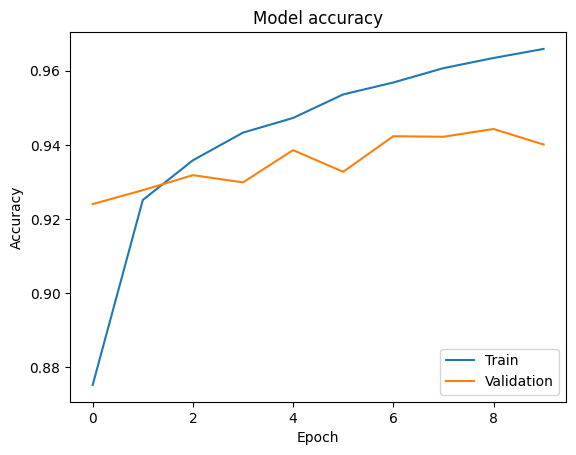

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
min_resnet.evaluate(x_train, y_train)

2359/2359 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9689 - loss: 0.0759


[0.07541260123252869, 0.9693159461021423]

In [ ]:
min_resnet.evaluate(x_val, y_val)

209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9338 - loss: 0.2100


[0.19482459127902985, 0.9400901198387146]

In [ ]:
x_test_reshaped = x_test.reshape(-1, 28, 28, 1)
pred_minres = min_resnet.predict(x_test_reshaped)
predicted_lable_minres = np.argmax(pred_minres, axis=1)

209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


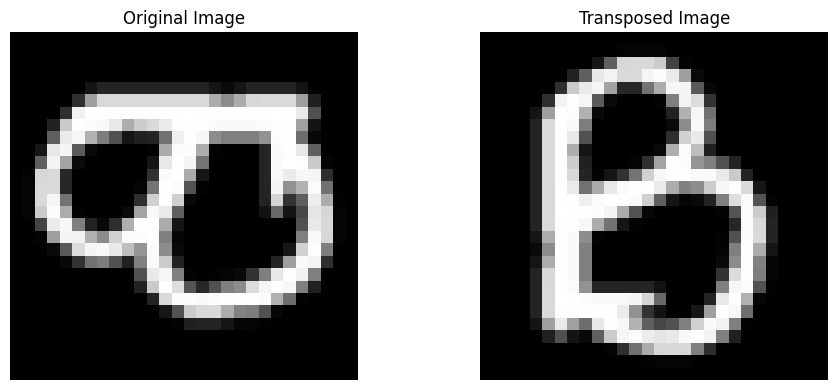

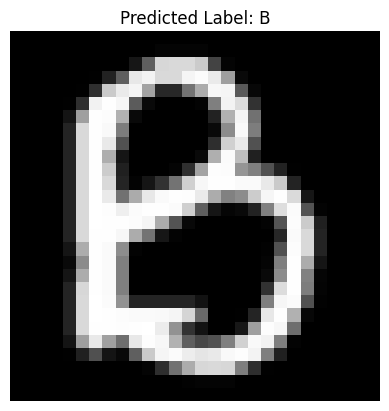

In [ ]:
predicted_label = labels[np.argmax(pred_minres[9])]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_test[9].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(x_test[9].reshape(28, 28).T, cmap='gray')
plt.axis('off')
plt.title('Transposed Image')

plt.tight_layout()
plt.show()

plt.imshow(x_test[9].reshape(28, 28).T, cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

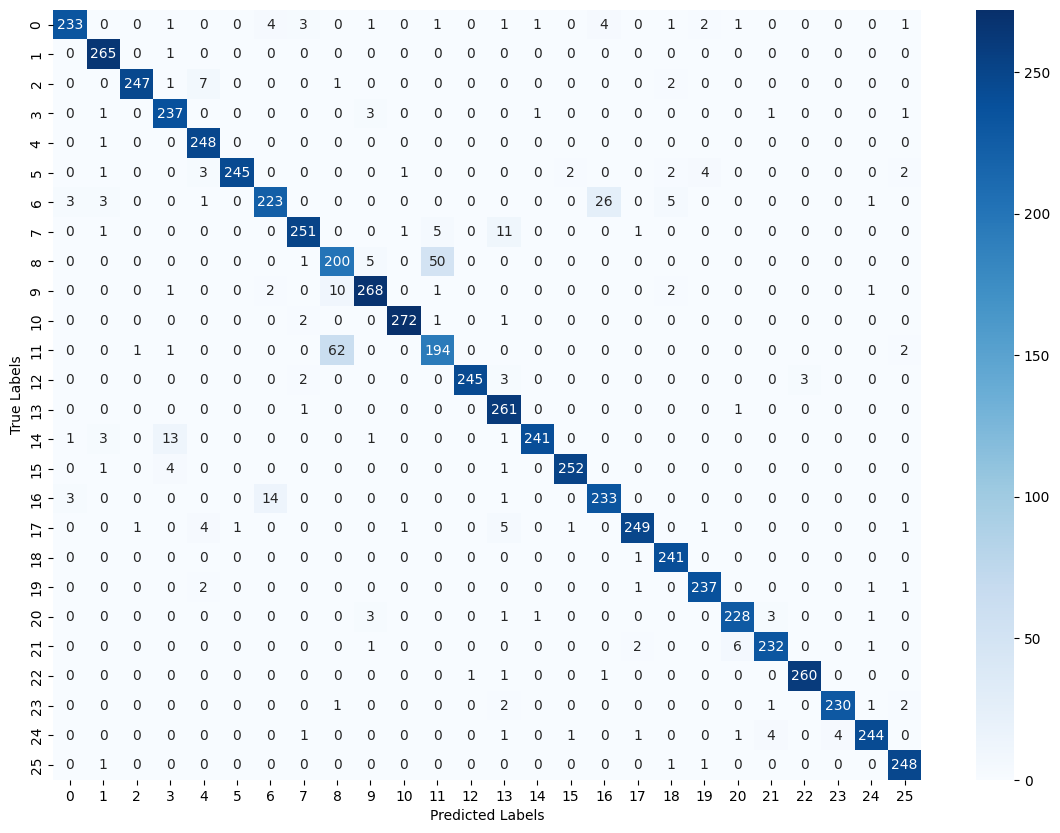

In [ ]:
cm = confusion_matrix(y_test,predicted_lable_minres)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
cr = classification_report(y_test, predicted_lable_minres)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       254
           1       0.96      1.00      0.98       266
           2       0.99      0.96      0.97       258
           3       0.92      0.97      0.94       244
           4       0.94      1.00      0.96       249
           5       1.00      0.94      0.97       260
           6       0.92      0.85      0.88       262
           7       0.96      0.93      0.95       270
           8       0.73      0.78      0.75       256
           9       0.95      0.94      0.95       285
          10       0.99      0.99      0.99       276
          11       0.77      0.75      0.76       260
          12       1.00      0.97      0.98       253
          13       0.90      0.99      0.94       263
          14       0.99      0.93      0.96       260
          15       0.98      0.98      0.98       258
          16       0.88      0.93      0.90       251
          17       0.98    

209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


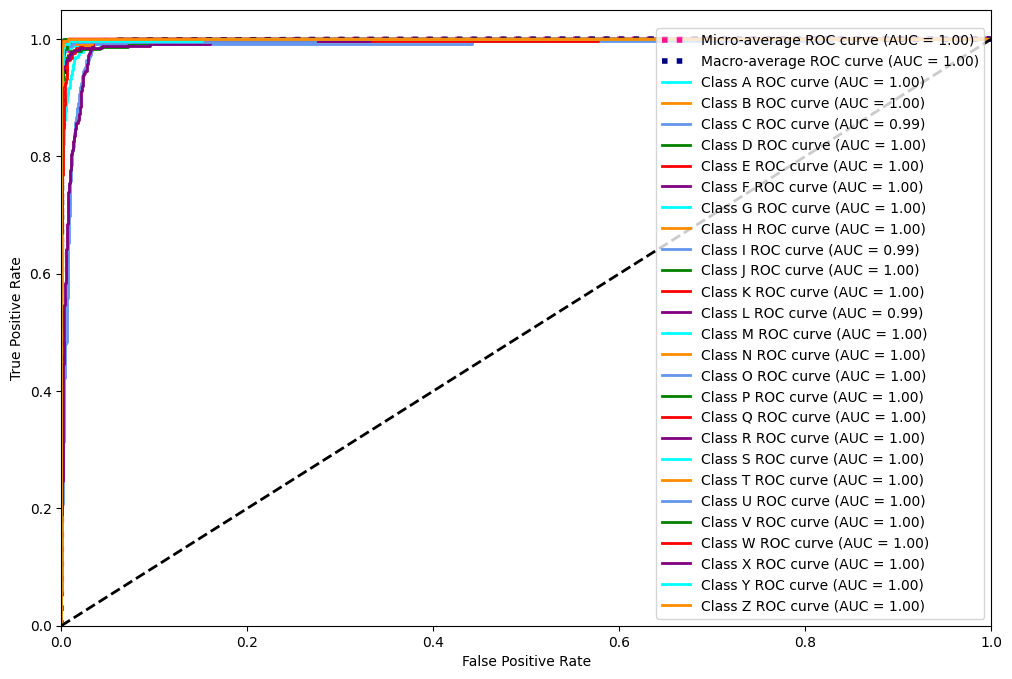

In [ ]:
# Binarize the true labels for ROC computation
y_test_binarized = label_binarize(y_test, classes=np.arange(len(labels)))
pred_minres_prob = min_resnet.predict(x_test.reshape(-1, 28, 28, 1))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

n_classes = len(labels)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], pred_minres_prob[:, i]) # Use predicted probabilities
    roc_auc[i] = auc(fpr[i], tpr[i])

# Computing micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), pred_minres_prob.ravel()) # Use predicted probabilities
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Computing macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plotting the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(
    fpr["micro"], tpr["micro"],
    label=f"Micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color='deeppink', linestyle=':', linewidth=4
)

# Plotting macro-average ROC curve
plt.plot(
    fpr["macro"], tpr["macro"],
    label=f"Macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color='navy', linestyle=':', linewidth=4
)

# Plotting ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i], tpr[i], color=color, lw=2,
        label=f"Class {labels[i]} ROC curve (AUC = {roc_auc[i]:.2f})"
    )
# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Building Original Resnet18 with images are converted to rgb and size (71,71)

In [ ]:
def resnet18(input_shape=(71, 71, 3), num_classes=26):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    x = residual_block(x, 64, strides=1)
    x = residual_block(x, 64, strides=1)

    x = residual_block(x, 128, strides=2)
    x = residual_block(x, 128, strides=1)

    x = residual_block(x, 256, strides=2)
    x = residual_block(x, 256, strides=1)

    x = residual_block(x, 512, strides=2)
    x = residual_block(x, 512, strides=1)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

In [ ]:
model = resnet18(input_shape=(71, 71, 3), num_classes=26)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_resnet_or = model.fit(x_train_rgb, y_train, batch_size=32, epochs=10, validation_data=(x_val_rgb, y_val),callbacks=[model_checkpoint])

Epoch 1/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8087 - loss: 0.6102
Epoch 1: val_accuracy improved from -inf to 0.88093, saving model to /content/drive/MyDrive/best_resnet.keras
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 99s 33ms/step - accuracy: 0.8087 - loss: 0.6101 - val_accuracy: 0.8809 - val_loss: 0.4063
Epoch 2/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9220 - loss: 0.2276
Epoch 2: val_accuracy improved from 0.88093 to 0.91351, saving model to /content/drive/MyDrive/best_resnet.keras
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 67s 28ms/step - accuracy: 0.9220 - loss: 0.2276 - val_accuracy: 0.9135 - val_loss: 0.2626
Epoch 3/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9346 - loss: 0.1822
Epoch 3: val_accuracy improved from 0.91351 to 0.91471, saving model to /content/drive/MyDrive/best_resnet.keras
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 67s 28ms/step - accuracy: 0.9346 - loss: 0.1822 - val_accuracy: 0.9147 - val_loss: 0.2532
Epoch 4/10
2359/2359 ━━━━━━━━━━━━━

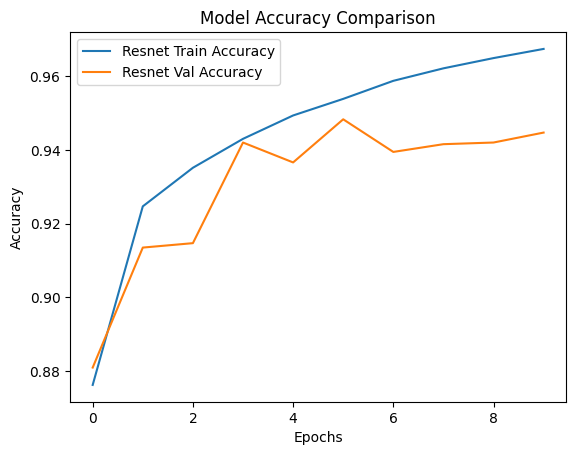

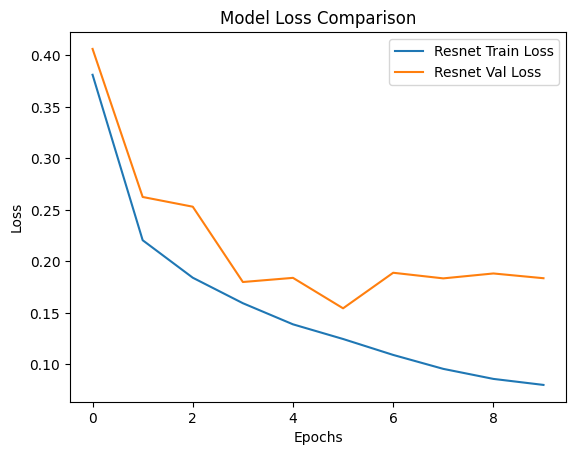

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy comparison


plt.plot(history_resnet_or.history['accuracy'], label='Resnet Train Accuracy')
plt.plot(history_resnet_or.history['val_accuracy'], label='Resnet Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss comparison

plt.plot(history_resnet_or.history['loss'], label='Resnet Train Loss')
plt.plot(history_resnet_or.history['val_loss'], label='Resnet Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('resnet18orig.keras')

In [ ]:
model.evaluate(x_val_rgb, y_val)

209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9423 - loss: 0.1818


[0.1837332844734192, 0.9447447657585144]

In [ ]:
model.evaluate(x_train_rgb, y_train)

2359/2359 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9726 - loss: 0.0661


[0.06396463513374329, 0.9734098315238953]

In [ ]:
y_pred_resnet = model.predict(x_test_rgb)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)
predicted_label_resnet = labels[y_pred_classes_resnet[9]]

209/209 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


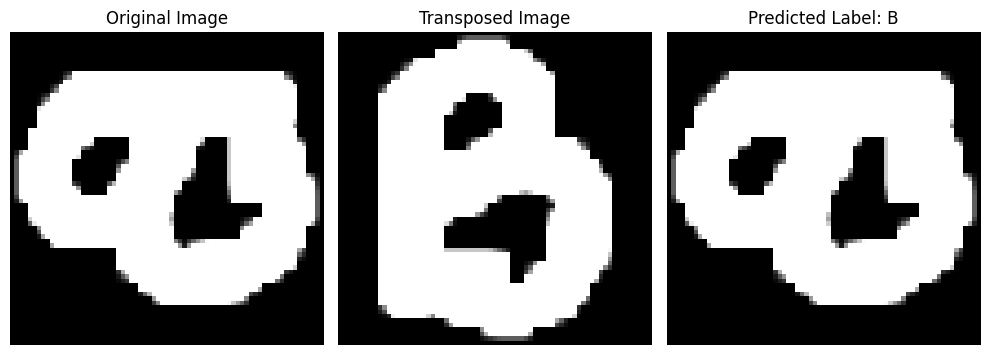

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(tf.reshape(x_test_rgb[9], (71, 71, 3)))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(tf.transpose(tf.reshape(x_test_rgb[9], (71, 71, 3)), perm=[1, 0, 2]))
plt.axis('off')
plt.title('Transposed Image')

plt.subplot(1, 3, 3)
plt.imshow(tf.reshape(x_test_rgb[9], (71, 71, 3)))
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label_resnet}')

plt.tight_layout()
plt.show()

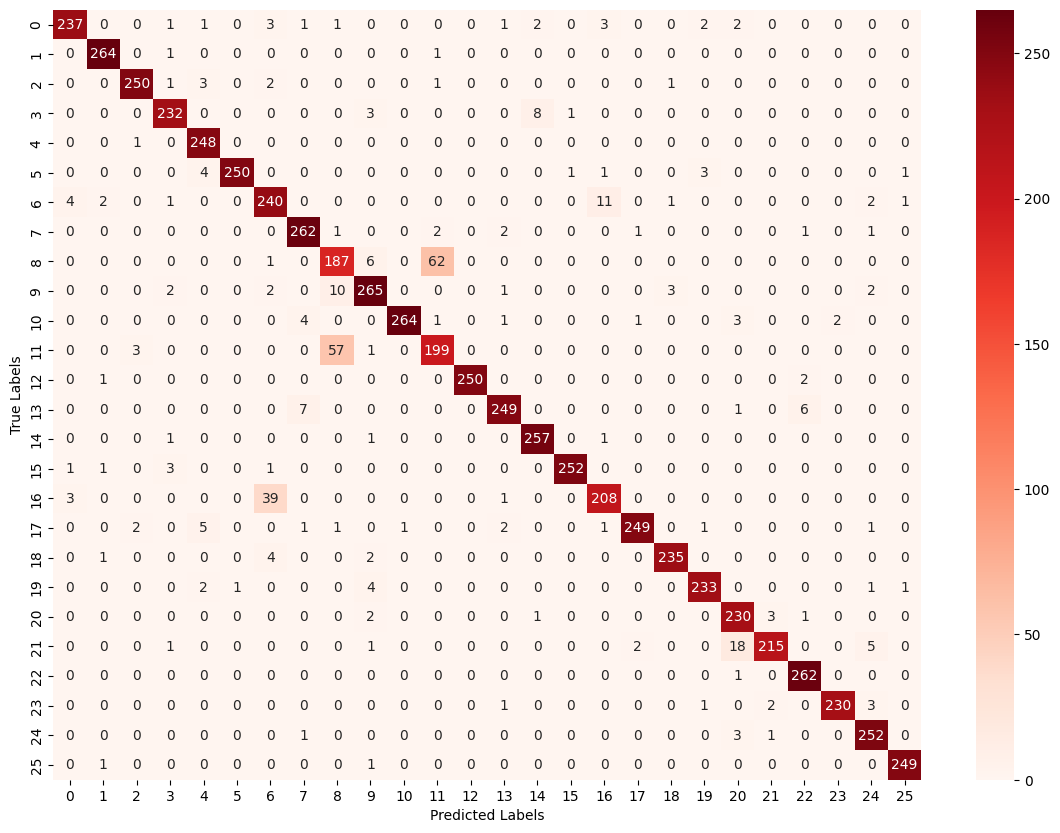

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes_resnet)

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
cr_res = classification_report(y_test, y_pred_classes_resnet)
print(cr_res)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       254
           1       0.98      0.99      0.99       266
           2       0.98      0.97      0.97       258
           3       0.95      0.95      0.95       244
           4       0.94      1.00      0.97       249
           5       1.00      0.96      0.98       260
           6       0.82      0.92      0.87       262
           7       0.95      0.97      0.96       270
           8       0.73      0.73      0.73       256
           9       0.93      0.93      0.93       285
          10       1.00      0.96      0.98       276
          11       0.75      0.77      0.76       260
          12       1.00      0.99      0.99       253
          13       0.97      0.95      0.96       263
          14       0.96      0.99      0.97       260
          15       0.99      0.98      0.98       258
          16       0.92      0.83      0.87       251
          17       0.98    

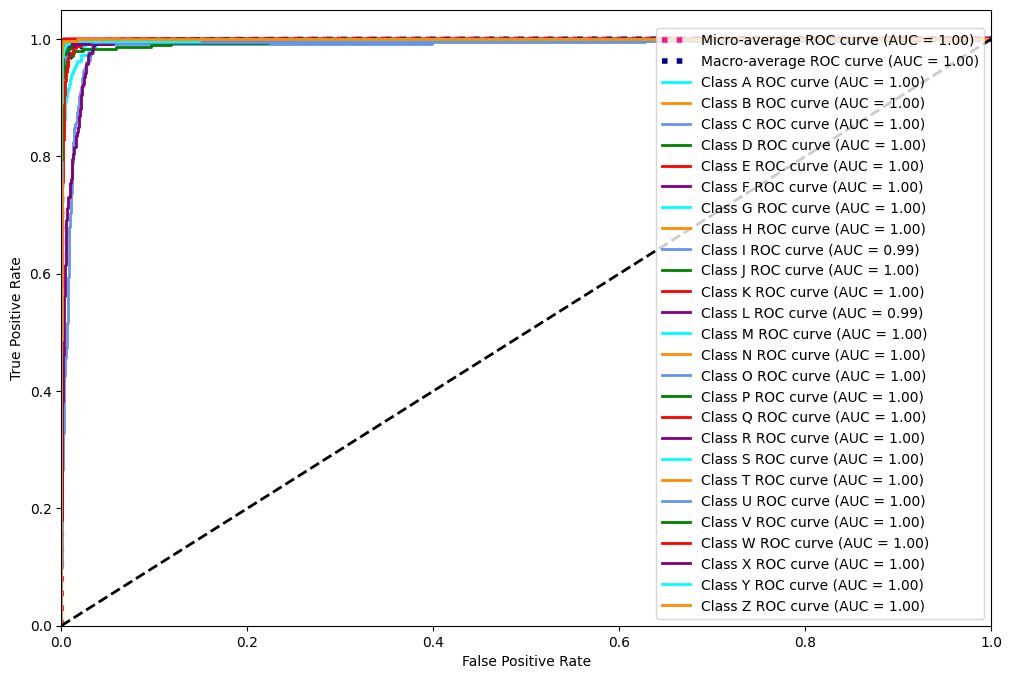

In [ ]:
# Binarize the true labels for ROC computation
y_test_binarized = label_binarize(y_test, classes=np.arange(len(labels)))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

n_classes = len(labels)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_resnet[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_resnet.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(12, 8))

# Plot micro-average ROC curve
plt.plot(
    fpr["micro"], tpr["micro"],
    label=f"Micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color='deeppink', linestyle=':', linewidth=4
)

# Plot macro-average ROC curve
plt.plot(
    fpr["macro"], tpr["macro"],
    label=f"Macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color='navy', linestyle=':', linewidth=4
)

# Plot ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i], tpr[i], color=color, lw=2,
        label=f"Class {labels[i]} ROC curve (AUC = {roc_auc[i]:.2f})"
    )

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Training on Densenet

In [ ]:
from tensorflow.keras.applications import DenseNet121

def pretrained_densenet(input_shape=(71, 71, 3), num_classes=26):
    # Pretrained DenseNet base
    base_model = DenseNet121(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    # Freeze the pretrained layers (optional)
    for layer in base_model.layers:
        layer.trainable = False

    return model

input_shape = (71, 71, 3)
num_classes = 26

densenet_model = pretrained_densenet(input_shape, num_classes)
densenet_model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 71, 71, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 77, 77, 3)      │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 36, 36, 64)     │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 36, 36, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 36, 36, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 38, 38, 64)     │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 18, 18, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 18, 18, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 18, 18, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 18, 18, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 18, 18, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 18, 18, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 18, 18, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 18, 18, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,575,642 (28.90 MB)

 Trainable params: 538,138 (2.05 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
densenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_densenet = densenet_model.fit(x_train_rgb, y_train, batch_size=32, epochs=10, validation_data=(x_test_rgb, y_test) , callbacks=[model_checkpoint_densenet])

Epoch 1/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7815 - loss: 0.6778
Epoch 1: val_accuracy improved from -inf to 0.79955, saving model to /content/drive/MyDrive/best_densenet.keras
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 75s 25ms/step - accuracy: 0.7815 - loss: 0.6778 - val_accuracy: 0.7995 - val_loss: 0.5960
Epoch 2/10
2356/2359 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8023 - loss: 0.5981
Epoch 2: val_accuracy improved from 0.79955 to 0.80420, saving model to /content/drive/MyDrive/best_densenet.keras
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.8023 - loss: 0.5981 - val_accuracy: 0.8042 - val_loss: 0.5758
Epoch 3/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8174 - loss: 0.5595
Epoch 3: val_accuracy improved from 0.80420 to 0.82417, saving model to /content/drive/MyDrive/best_densenet.keras
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8174 - loss: 0.5595 - val_accuracy: 0.8242 - val_loss: 0.5311
Epoch 4/10
2356/2359 ━━━━━━━

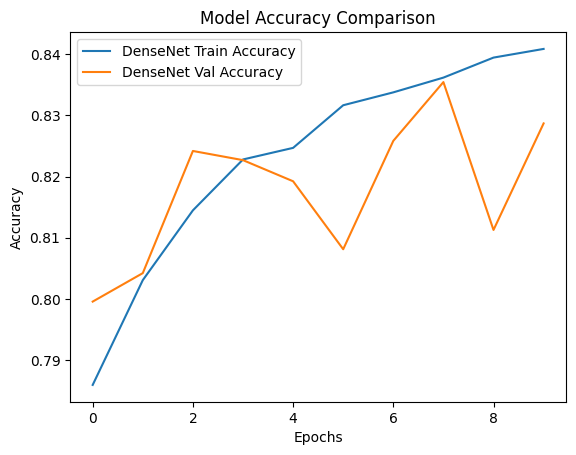

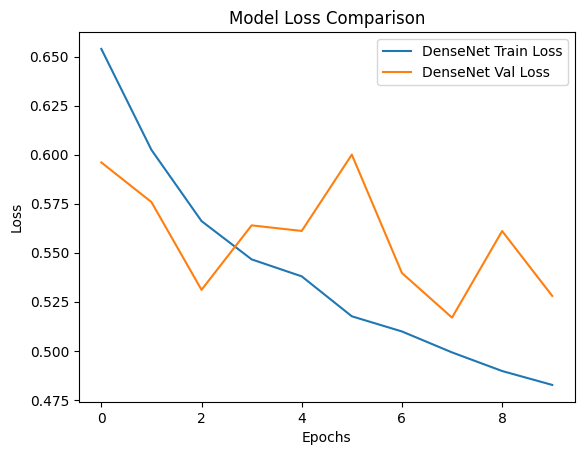

In [ ]:
#Accuracy
plt.plot(history_densenet.history['accuracy'], label='DenseNet Train Accuracy')
plt.plot(history_densenet.history['val_accuracy'], label='DenseNet Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Loss
plt.plot(history_densenet.history['loss'], label='DenseNet Train Loss')
plt.plot(history_densenet.history['val_loss'], label='DenseNet Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
densenet_model.save('/content/drive/MyDrive/densenet.keras')

In [ ]:
#densenet_model = load_model('/content/drive/MyDrive/densnet.keras')

In [ ]:
y_pred_densenet = densenet_model.predict(x_test_rgb)
y_pred_classes_densenet = tf.argmax(y_pred_densenet, axis=1)
predicted_label_densenet = labels[y_pred_classes_densenet[9]]

209/209 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step


In [ ]:
cr_densenet = classification_report(y_test, y_pred_classes_densenet)
print(cr_densenet)

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       254
           1       0.80      0.79      0.79       266
           2       0.96      0.80      0.87       258
           3       0.78      0.90      0.84       244
           4       0.76      0.94      0.84       249
           5       0.84      0.82      0.83       260
           6       0.61      0.56      0.59       262
           7       0.79      0.87      0.82       270
           8       0.63      0.75      0.69       256
           9       0.92      0.84      0.88       285
          10       0.96      0.88      0.92       276
          11       0.77      0.62      0.69       260
          12       0.97      0.83      0.90       253
          13       0.68      0.93      0.79       263
          14       0.83      0.96      0.89       260
          15       0.94      0.90      0.92       258
          16       0.72      0.55      0.63       251
          17       0.90    

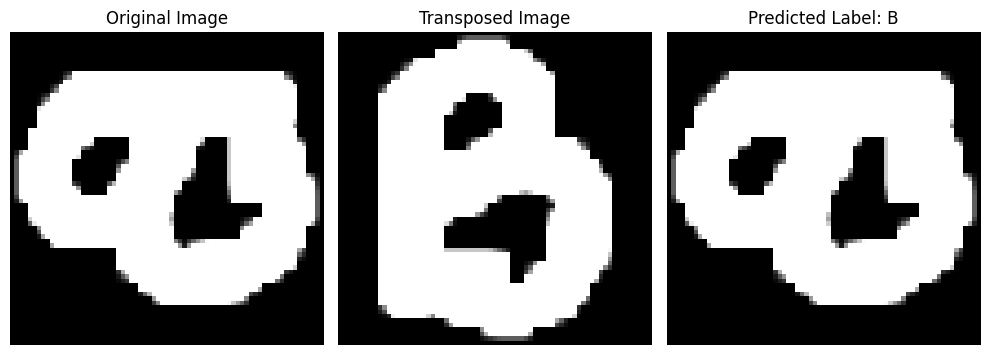

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(tf.reshape(x_test_rgb[9], (71, 71, 3)))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(tf.transpose(tf.reshape(x_test_rgb[9], (71, 71, 3)), perm=[1, 0, 2]))
plt.axis('off')
plt.title('Transposed Image')

plt.subplot(1, 3, 3)
plt.imshow(tf.reshape(x_test_rgb[9], (71, 71, 3)))
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label_resnet}')

plt.tight_layout()
plt.show()

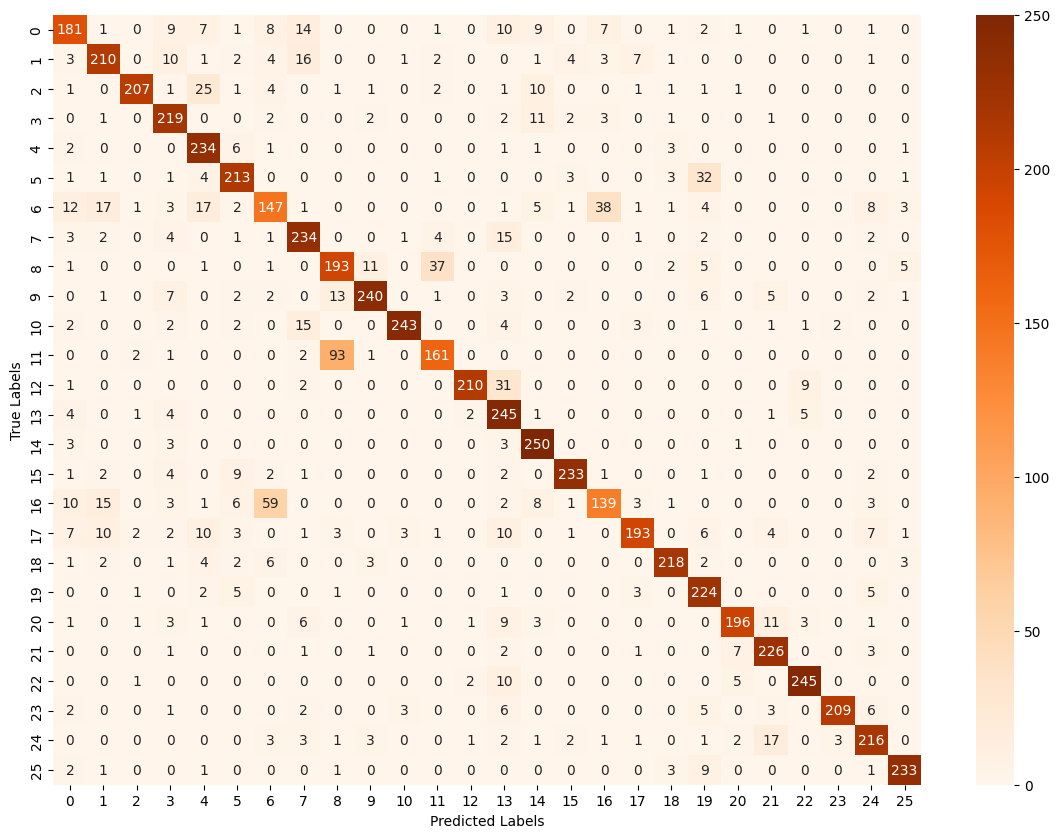

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes_densenet)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

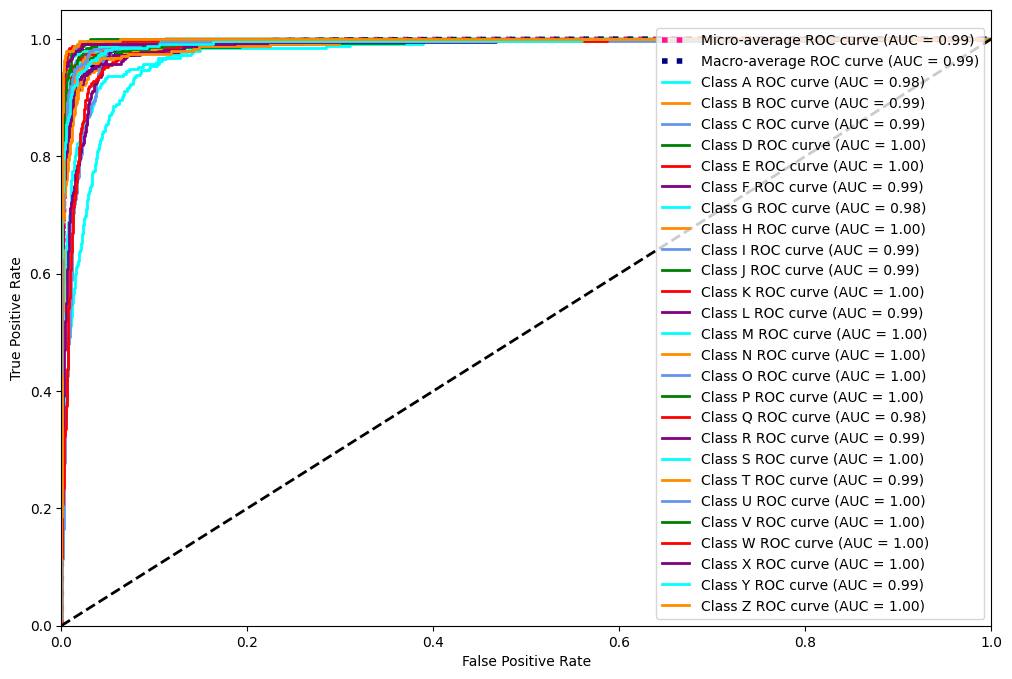

In [ ]:
# Binarize the true labels for ROC computation
y_test_binarized = label_binarize(y_test, classes=np.arange(len(labels)))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

n_classes = len(labels)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_densenet[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_densenet.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(12, 8))

# Plot micro-average ROC curve
plt.plot(
    fpr["micro"], tpr["micro"],
    label=f"Micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color='deeppink', linestyle=':', linewidth=4
)

# Plot macro-average ROC curve
plt.plot(
    fpr["macro"], tpr["macro"],
    label=f"Macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color='navy', linestyle=':', linewidth=4
)

# Plot ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i], tpr[i], color=color, lw=2,
        label=f"Class {labels[i]} ROC curve (AUC = {roc_auc[i]:.2f})"
    )

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
densenet_model.save('densnet.h5')

### Training on Xception model

In [ ]:
from keras.applications import Xception
def pretrained_xception(input_shape=(71, 71, 3), num_classes=26):
    inputs = Input(shape=input_shape)
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_tensor=inputs
    )
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
xception_model = pretrained_xception(input_shape=(71, 71, 3), num_classes=26)
xception_model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 71, 71, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 35, 35, 32)     │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 35, 35, 32)     │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 35, 35, 32)     │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 33, 33, 64)     │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 33, 33, 64)     │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 33, 33, 64)     │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 33, 33, 128)    │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 33, 33, 128)    │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 33, 33, 128)    │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 33, 33, 128)    │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 33, 33, 128)    │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 17, 17, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 17, 17, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 21,923,906 (83.63 MB)

 Trainable params: 21,869,378 (83.43 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
xception_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_xception = xception_model.fit(x_train_rgb, y_train, batch_size=32, epochs=10, validation_data=(x_val_rgb, y_val),callbacks=[model_checkpoint_xception])

Epoch 1/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8024 - loss: 0.6714
Epoch 1: val_accuracy improved from -inf to 0.92312, saving model to /content/drive/MyDrive/best_xception.keras
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 220s 79ms/step - accuracy: 0.8024 - loss: 0.6713 - val_accuracy: 0.9231 - val_loss: 0.2348
Epoch 2/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9272 - loss: 0.2243
Epoch 2: val_accuracy did not improve from 0.92312
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 166s 70ms/step - accuracy: 0.9272 - loss: 0.2243 - val_accuracy: 0.9207 - val_loss: 0.2491
Epoch 3/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9392 - loss: 0.1839
Epoch 3: val_accuracy improved from 0.92312 to 0.94565, saving model to /content/drive/MyDrive/best_xception.keras
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 167s 71ms/step - accuracy: 0.9392 - loss: 0.1839 - val_accuracy: 0.9456 - val_loss: 0.1756
Epoch 4/10
2359/2359 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9463 - loss: 0.1568


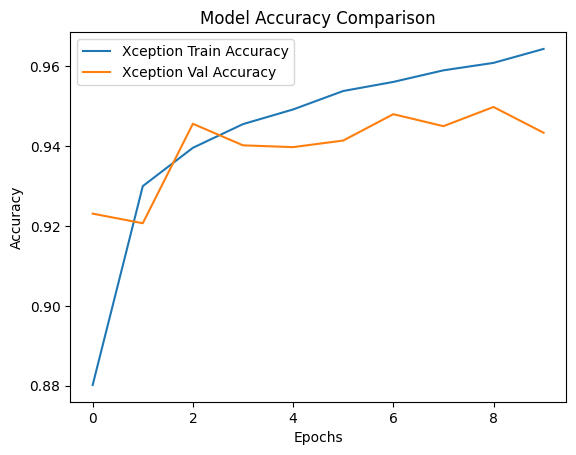

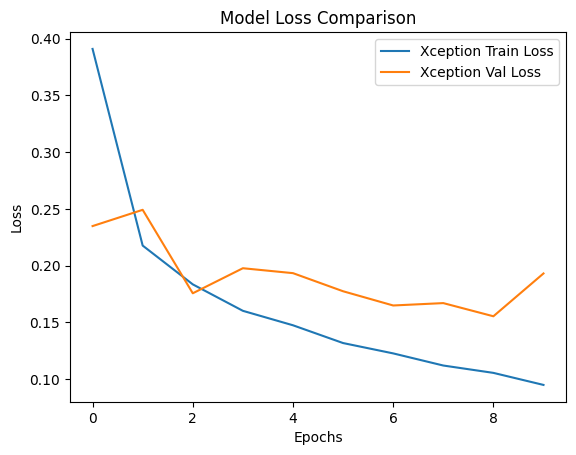

In [ ]:
#Accuracy
plt.plot(history_xception.history['accuracy'], label='Xception Train Accuracy')
plt.plot(history_xception.history['val_accuracy'], label='Xception Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Loss
plt.plot(history_xception.history['loss'], label='Xception Train Loss')
plt.plot(history_xception.history['val_loss'], label='Xception Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
history_xception1 = load_model('/content/drive/MyDrive/best_xception.keras')

In [ ]:
xception_model.save('/content/drive/MyDrive/xception.keras')

In [ ]:
xception_model.evaluate(x_val_rgb, y_val)

209/209 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9382 - loss: 0.1964


[0.19302569329738617, 0.9433934092521667]

In [ ]:
xception_model.evaluate(x_train_rgb, y_train)

2359/2359 ━━━━━━━━━━━━━━━━━━━━ 48s 20ms/step - accuracy: 0.9640 - loss: 0.1049


[0.10140937566757202, 0.9647451639175415]

In [ ]:
y_pred_xception = xception_model.predict(x_test_rgb)
y_pred_classes_xception = tf.argmax(y_pred_xception, axis=1)
predicted_label_xception = labels[y_pred_classes_xception[9]]

209/209 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


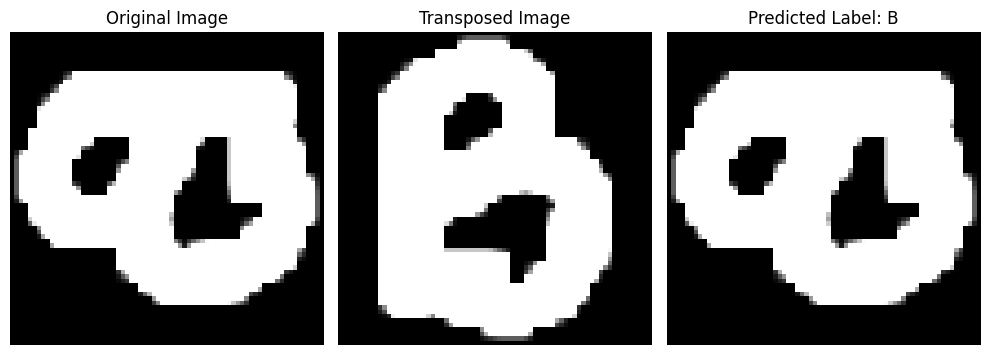

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(tf.reshape(x_test_rgb[9], (71, 71, 3)))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(tf.transpose(tf.reshape(x_test_rgb[9], (71, 71, 3)), perm=[1, 0, 2]))
plt.axis('off')
plt.title('Transposed Image')

plt.subplot(1, 3, 3)
plt.imshow(tf.reshape(x_test_rgb[9], (71, 71, 3)))
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label_xception}')

plt.tight_layout()
plt.show()

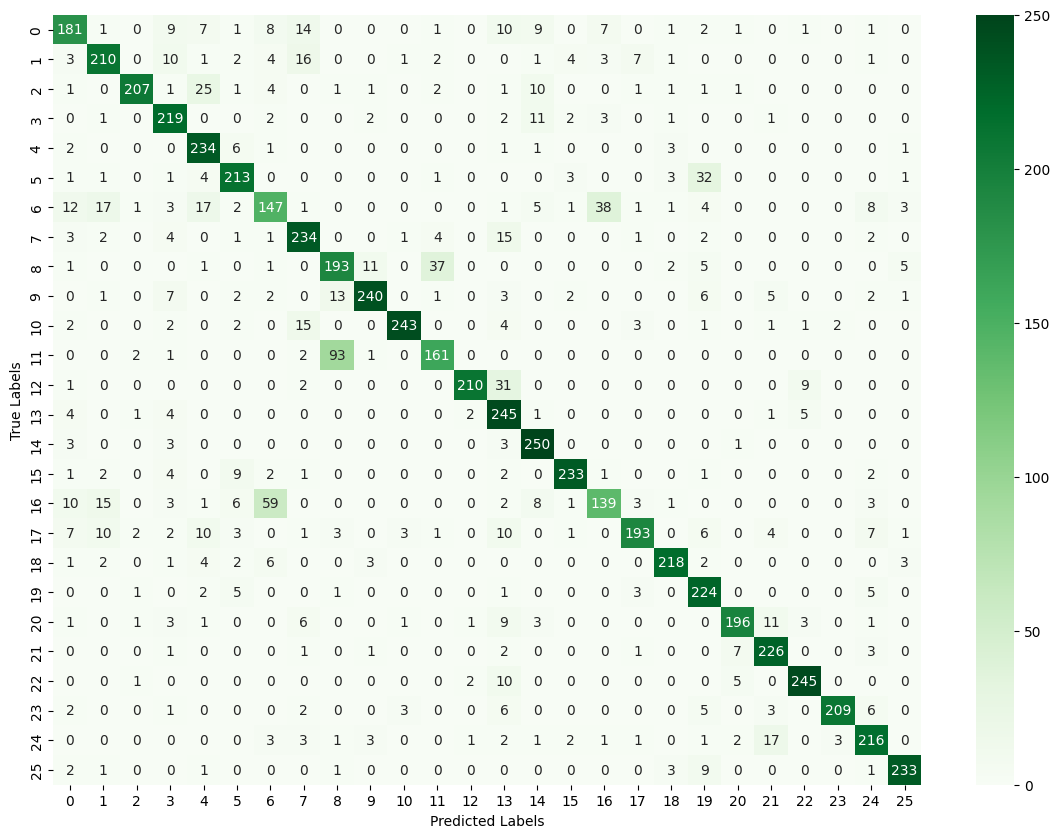

In [ ]:
cm_x = confusion_matrix(y_test, y_pred_classes_densenet)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
cr_x = classification_report(y_test, y_pred_classes_xception)
print(cr_x)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       254
           1       0.91      1.00      0.95       266
           2       0.99      0.96      0.97       258
           3       0.93      0.96      0.95       244
           4       0.96      0.99      0.98       249
           5       0.98      0.97      0.98       260
           6       0.97      0.71      0.82       262
           7       0.97      0.98      0.97       270
           8       0.69      0.84      0.76       256
           9       0.94      0.95      0.95       285
          10       1.00      0.99      0.99       276
          11       0.83      0.67      0.74       260
          12       1.00      1.00      1.00       253
          13       0.96      0.98      0.97       263
          14       0.98      0.98      0.98       260
          15       0.98      0.98      0.98       258
          16       0.81      0.97      0.88       251
          17       0.98    

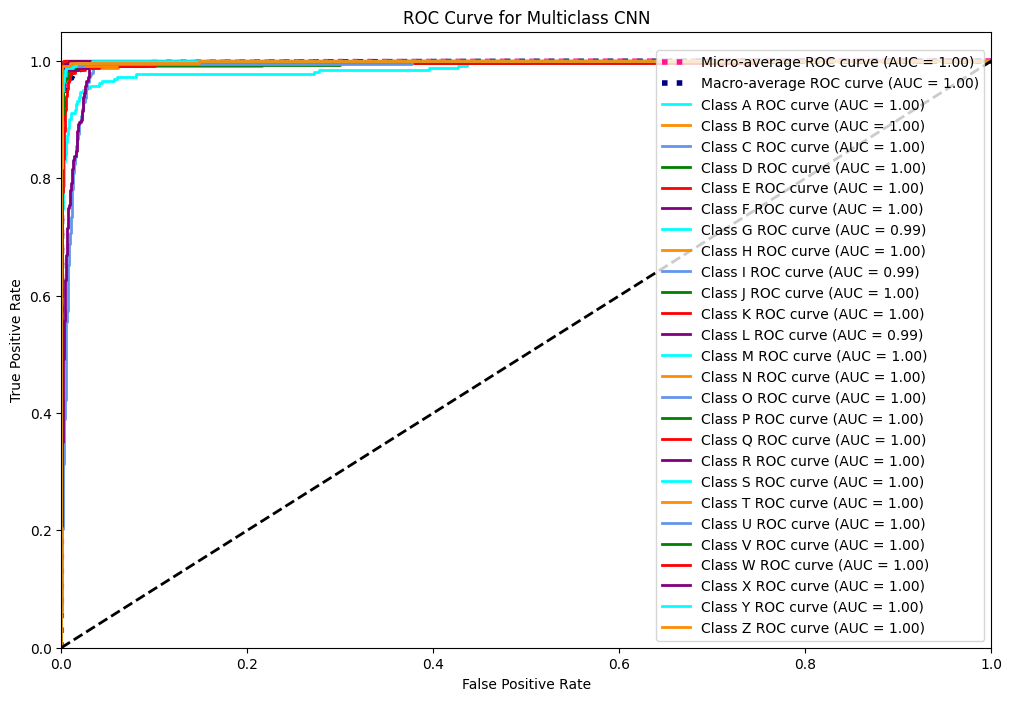

In [ ]:
# Binarize the true labels for ROC computation
y_test_binarized = label_binarize(y_test, classes=np.arange(len(labels)))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

n_classes = len(labels)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_xception[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_xception.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(12, 8))

# Plot micro-average ROC curve
plt.plot(
    fpr["micro"], tpr["micro"],
    label=f"Micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color='deeppink', linestyle=':', linewidth=4
)

# Plot macro-average ROC curve
plt.plot(
    fpr["macro"], tpr["macro"],
    label=f"Macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color='navy', linestyle=':', linewidth=4
)

# Plot ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i], tpr[i], color=color, lw=2,
        label=f"Class {labels[i]} ROC curve (AUC = {roc_auc[i]:.2f})"
    )

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()